In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-53.20643388804585 -21.009612261358143
85.38972044657825 18.286558532173814
-77.25050276949759 107.80085615422797
31.579461810483195 -48.4279088816227
-6.905265453665379 117.17303111234168
-57.837808520173176 177.5121032244162
83.30710499409503 35.58306134736176
-23.877192189284713 25.878216384455186
56.58170118491444 -12.911769631439256
-81.81550633266002 -31.71332604838716
21.68895416696124 50.03264542529459
3.3562315919008654 102.87486283605483
-39.31031364356805 6.067680520921783
-40.49282126056701 0.06881250121492144
-9.09933894257614 19.571265392224717
19.442006427577567 136.84847230977562
35.79038613456213 -47.77962754178296
3.4810348946770944 -45.902669518271324
-67.98442719487792 109.35641469285514
48.876630802504366 -8.197466125341379
0.14909072689412994 -177.50928561582353
5.558215820438008 -76.27401544437886
76.2306547019941 -75.80473313803977
27.049154931288825 159.11403134479468
-34.75340548183872 -107.04900745260416
-19.406494197055395 137.09926171511057
-26.405274571922

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | boatlaname
City not found. Skipping...
Processing Record 9 of Set 1 | westport
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | abu samrah
Processing Record 12 of Set 1 | temerloh
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | saurimo
Processing Record 15 of Set 1 | nishihara
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | salinopolis
Processing Record 18 of Set 1 | clonakilty
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | bagado
Processing Record 21 of Set 1 |

Processing Record 37 of Set 4 | adrar
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | lazaro cardenas
Processing Record 40 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 41 of Set 4 | chulym
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | prince rupert
Processing Record 44 of Set 4 | bucerias
Processing Record 45 of Set 4 | magdagachi
Processing Record 46 of Set 4 | manacapuru
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | la reforma
Processing Record 50 of Set 4 | barabai
Processing Record 1 of Set 5 | gamba
Processing Record 2 of Set 5 | banyo
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | tateyama
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | kenai
Processing Record 7 of Set 5 | springbok
Processing Record 8 of Set 5 | marapanim
Processing Record 9 of Set 5 | anandnagar
Processing Record 10 o

Processing Record 29 of Set 8 | yablonovo
Processing Record 30 of Set 8 | rungata
City not found. Skipping...
Processing Record 31 of Set 8 | marzuq
Processing Record 32 of Set 8 | zaterechnyy
Processing Record 33 of Set 8 | port hardy
Processing Record 34 of Set 8 | sangar
Processing Record 35 of Set 8 | tibu
Processing Record 36 of Set 8 | kalga
Processing Record 37 of Set 8 | grand gaube
Processing Record 38 of Set 8 | peniche
Processing Record 39 of Set 8 | meulaboh
Processing Record 40 of Set 8 | vestmannaeyjar
Processing Record 41 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 42 of Set 8 | tigil
Processing Record 43 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 8 | smidovich
Processing Record 45 of Set 8 | havre-saint-pierre
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | rio gallegos
Processing Record 48 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 49 of Set 8 | pevek
Pro

Processing Record 15 of Set 12 | bouca
Processing Record 16 of Set 12 | sechura
Processing Record 17 of Set 12 | labuhan
Processing Record 18 of Set 12 | sorsk
Processing Record 19 of Set 12 | alta floresta
Processing Record 20 of Set 12 | agadez
Processing Record 21 of Set 12 | kozulka
Processing Record 22 of Set 12 | muisne
Processing Record 23 of Set 12 | moose factory
Processing Record 24 of Set 12 | colesberg
Processing Record 25 of Set 12 | tak bai
Processing Record 26 of Set 12 | loa janan
Processing Record 27 of Set 12 | dehloran
Processing Record 28 of Set 12 | santa isabel do rio negro
Processing Record 29 of Set 12 | la peca
Processing Record 30 of Set 12 | carutapera
Processing Record 31 of Set 12 | coolidge
Processing Record 32 of Set 12 | beloha
Processing Record 33 of Set 12 | montrose
Processing Record 34 of Set 12 | aldan
Processing Record 35 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 12 | meyungs
City not found. Skipping...
Processing Record 37 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,76.86,73,75,12.66,BR,2022-05-12 18:57:25
1,Longyearbyen,78.2186,15.6401,19.24,63,0,14.97,SJ,2022-05-12 18:57:26
2,Albany,42.6001,-73.9662,86.92,30,19,4.00,US,2022-05-12 18:54:34
3,Saint George,37.1041,-113.5841,68.79,21,0,4.61,US,2022-05-12 18:53:48
4,Kaitangata,-46.2817,169.8464,45.28,81,99,5.39,NZ,2022-05-12 18:57:26
5,Vardo,70.3705,31.1107,39.18,70,0,12.66,NO,2022-05-12 18:57:26
6,Westport,41.1415,-73.3579,80.28,67,75,5.01,US,2022-05-12 18:54:13
7,Ushuaia,-54.8000,-68.3000,44.26,93,75,1.14,AR,2022-05-12 18:57:27
8,Abu Samrah,35.3029,37.1841,65.71,45,75,8.79,SY,2022-05-12 18:57:27
9,Temerloh,3.4483,102.4176,73.98,98,71,3.11,MY,2022-05-12 18:57:27


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2022-05-12 18:57:25,-22.9661,-42.0278,76.86,73,75,12.66
1,Longyearbyen,SJ,2022-05-12 18:57:26,78.2186,15.6401,19.24,63,0,14.97
2,Albany,US,2022-05-12 18:54:34,42.6001,-73.9662,86.92,30,19,4.00
3,Saint George,US,2022-05-12 18:53:48,37.1041,-113.5841,68.79,21,0,4.61
4,Kaitangata,NZ,2022-05-12 18:57:26,-46.2817,169.8464,45.28,81,99,5.39


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

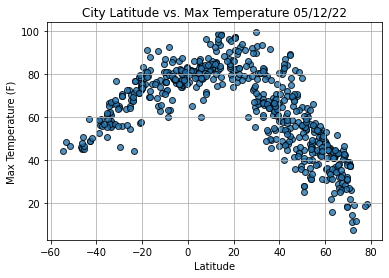

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

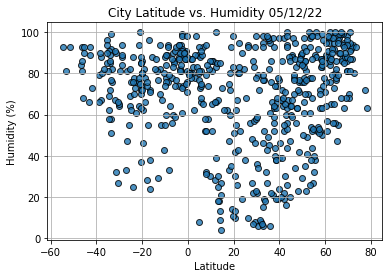

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

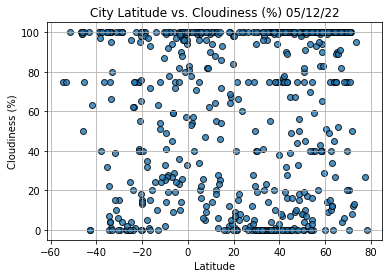

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

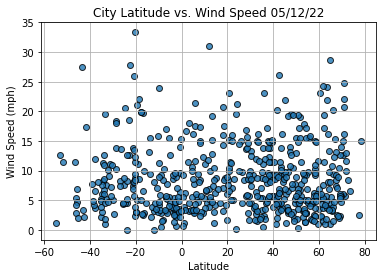

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

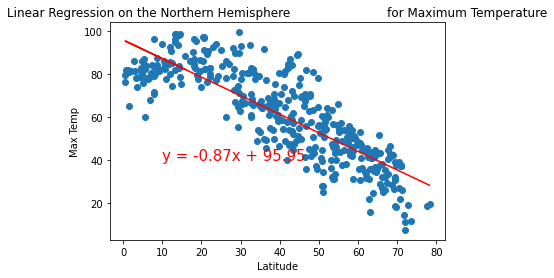

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

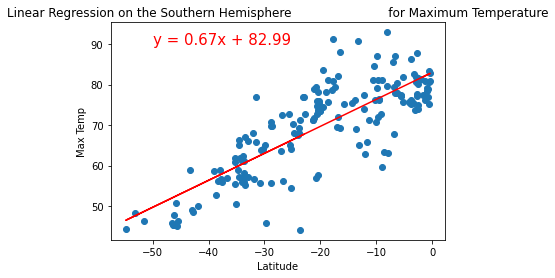

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

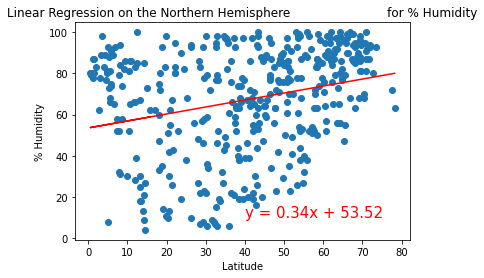

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

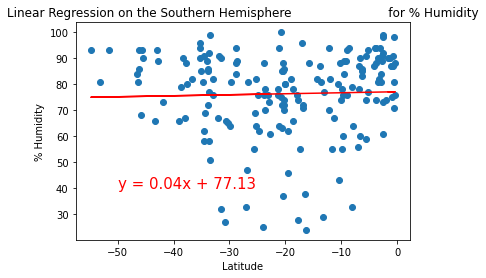

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,40))

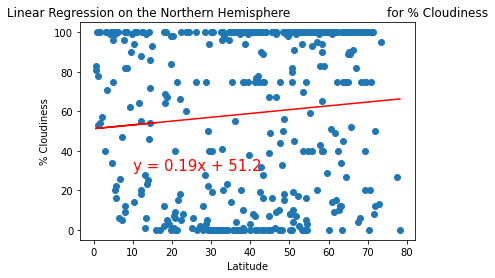

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10, 30))

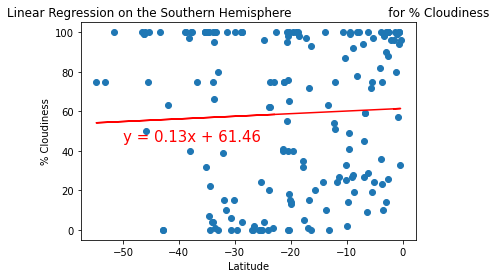

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,45))

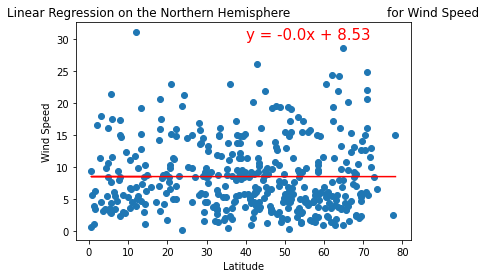

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

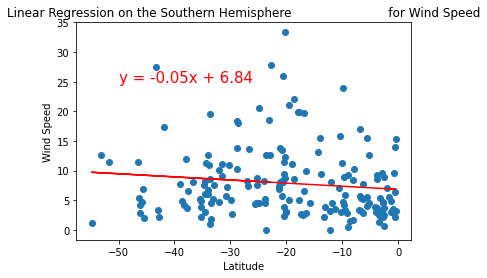

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))